In [11]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
#always remember your magic function if using Jupyter
%matplotlib inline

pd.set_option('display.max_rows',30)

os.chdir('/Users/alexandrejacqueline/Data_Science/P2')

In [12]:
data = pd.read_csv('EdStatsData.csv', sep=",")
footnote = pd.read_csv('EdStatsFootNote.csv', sep=",")
series = pd.read_csv('EdStatsSeries.csv', sep=",")
country = pd.read_csv('EdStatsCountry.csv', sep=",")
country_series = pd.read_csv('EdStatsCountry-Series.csv', sep=",")


In [13]:
def clean_header(df):
    """
This functions removes weird characters and spaces from column names, while keeping everything lower case
"""
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [14]:
import inspect
def retrieve_name(var):
    '''afficher le nom d\'une variable '''
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]
list_dataset = [country, country_series, data, footnote, series]
for dataset in list_dataset:
    print('{} possède {} lignes et {} colonnes.'.format(retrieve_name(dataset)[0], dataset.shape[0], dataset.shape[1]))


country possède 241 lignes et 32 colonnes.
country_series possède 613 lignes et 4 colonnes.
data possède 886930 lignes et 70 colonnes.
footnote possède 643638 lignes et 5 colonnes.
series possède 3665 lignes et 21 colonnes.


In [15]:
for i in [data,footnote,series,country,country_series]: 
    print("-------------")
    print(i.isna().any(), i.isnull().mean())

-------------
Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
1970               True
                  ...  
2085               True
2090               True
2095               True
2100               True
Unnamed: 69        True
Length: 70, dtype: bool Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64
-------------
CountryCode    False
SeriesCode     False
Year           False
DESCRIPTION    False
Unnamed: 4      True
dtype: bool CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64
-------------
Series Code                            False
Topic                                  False
Indicator Name               

## Valeur manquante 

In [18]:
"""# on compte le nombre de valeurs manquantes pour la ligne et on stocke dans une nouvelle colonne
df['NB_NAN'] = df.isna().sum(axis=1)
# trie des lignes en fonction du nombre de valeurs manquantes
df= df.sort_values('NB_NAN')
# suppression des duplicatas en gardant les versions les mieux remplies
df= df.drop_duplicates('Country Name', keep='first')
# on supprime la colonne qui n'est plus utile
df = df.drop('NB_NAN', axis=1)
 """

"# on compte le nombre de valeurs manquantes pour la ligne et on stocke dans une nouvelle colonne\ndf['NB_NAN'] = df.isna().sum(axis=1)\n# trie des lignes en fonction du nombre de valeurs manquantes\ndf= df.sort_values('NB_NAN')\n# suppression des duplicatas en gardant les versions les mieux remplies\ndf= df.drop_duplicates('Country Name', keep='first')\n# on supprime la colonne qui n'est plus utile\ndf = df.drop('NB_NAN', axis=1)\n "

## Missing values

In [19]:
# Créer une nouvelle fonction qui détermine si la valeur en paramètre est manquante:
def num_missing(x):
    return sum(x.isnull().sort_values(ascending=False))


In [20]:
"""list_dataset = [country, country_series, data, footnote, series]

for dataset in list_dataset:

    print("----------------")
    
    print(dataset.shape)
# On applique cette fonction pour chaque colonne:
    print("Valeurs manquantes par colonne:")
    print(dataset.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne
# Puis application pour chaque ligne:
    print("\nValeurs manquantes par ligne:")
    print(dataset.apply(num_missing, axis=1).head()) #axis=1 définit que la fonction sera bien appliquée sur chaque lignee    """

'list_dataset = [country, country_series, data, footnote, series]\n\nfor dataset in list_dataset:\n\n    print("----------------")\n    \n    print(dataset.shape)\n# On applique cette fonction pour chaque colonne:\n    print("Valeurs manquantes par colonne:")\n    print(dataset.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne\n# Puis application pour chaque ligne:\n    print("\nValeurs manquantes par ligne:")\n    print(dataset.apply(num_missing, axis=1).head()) #axis=1 définit que la fonction sera bien appliquée sur chaque lignee    '

In [ ]:
list_dataset = [country, country_series, data, footnote, series]

In [32]:
# Créer une nouvelle fonction qui détermine si la valeur en paramètre est manquante:
def num_missing(x):
    return sum(x.isnull().sort_values(ascending=False))


# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(x.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne
# Puis application pour chaque ligne:
print("\nValeurs manquantes par ligne:")
print(x.apply(num_missing, axis=1).head()) #axis=1 définit que la fonction sera bien appliquée sur chaque lignee

Valeurs manquantes par colonne:
Country Code                      0
Short Name                        0
Table Name                        0
Long Name                         0
2-alpha code                      3
                               ... 
Latest agricultural census       99
Latest industrial data          134
Latest trade data                56
Latest water withdrawal data     62
Unnamed: 31                     241
Length: 32, dtype: int64

Valeurs manquantes par ligne:
0    14
1     7
2     6
3     4
4    17
dtype: int64


## Country

In [33]:
country.shape

(241, 32)

Selon l'ONU, il y a 197 Etats. Or la liste en comporte 241. Comment expliquer la différence?

On voit qu'il y a un certain nombre de noms qui correspondent en fait à des zones

In [34]:
country.head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN


In [35]:
country['Income Group'].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

In [36]:
country['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

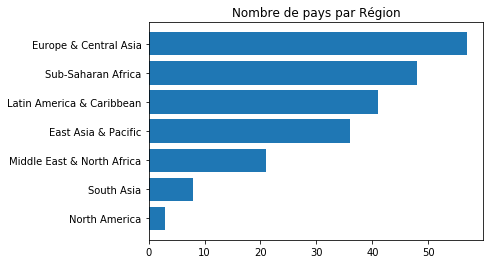

In [37]:
plt.barh(y = country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'], width = country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par Région')
plt.show()

In [38]:
country['Currency Unit'].value_counts(normalize = True).to_frame()

,Currency Unit
Euro,0.106977
CFA franc,0.065116
U.S. dollar,0.065116
East Caribbean dollar,0.027907
Australian dollar,0.013953
...,...
Papua New Guinea kina,0.004651
Pakistani rupee,0.004651
Swedish krona,0.004651
Myanmar kyat,0.004651


In [39]:
 country['Currency Unit'].value_counts().to_frame()

,Currency Unit
Euro,23
CFA franc,14
U.S. dollar,14
East Caribbean dollar,6
Australian dollar,3
...,...
Papua New Guinea kina,1
Pakistani rupee,1
Swedish krona,1
Myanmar kyat,1


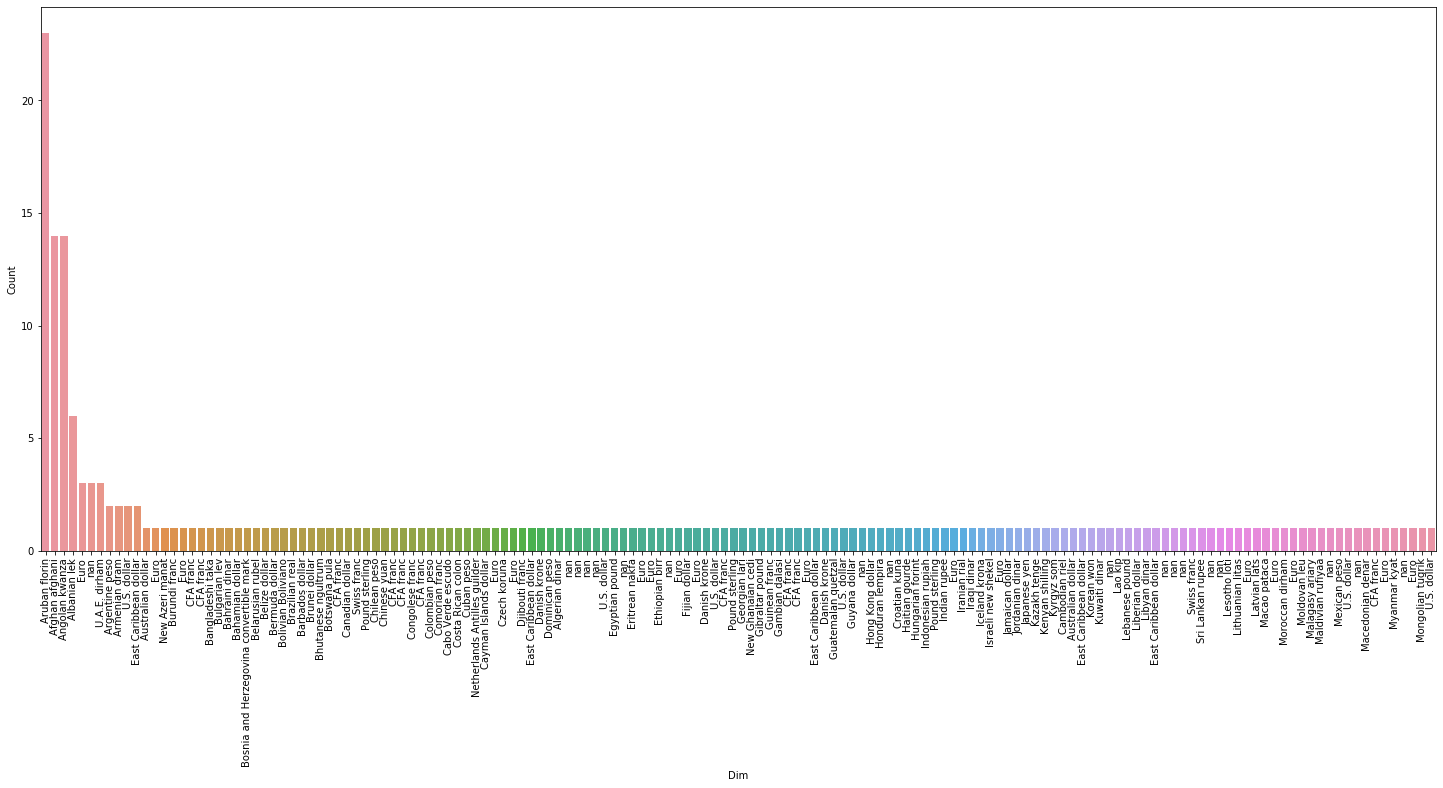

In [41]:
plt.figure(figsize=(25,10))
#sns.barplot(x=country['Currency Unit'].value_counts().index , y =  country['Currency Unit'].value_counts())

# plot barh chart with index as x values
ax = sns.barplot(x=country['Currency Unit'].value_counts().index , y =  country['Currency Unit'].value_counts())
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Dim", ylabel='Count')

# add proper Dim values as x labels
ax.set_xticklabels(country['Currency Unit'])
for item in ax.get_xticklabels(): item.set_rotation(90)


plt.show()

In [42]:
areas = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'East Asia & Pacific (developing only)',
         'East Asia & Pacific (all income levels)',
         'Euro area',
         'European Union'
         'Europe & Centraµl Asia',
         'Europe & Central Asia (excluding high income)',
         'Europe & Central Asia (developing only)',
         'Europe & Central Asia (all income levels)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (developing only)',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle East & North Africa (all income levels)',
         'Middle East & North Africa (developing only)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World',
        ]

In [43]:
country[~country['Short Name'].isin(areas)]['Short Name'].unique().shape

(219,)

In [44]:


list_countries = country[~country['Short Name'].isin(areas)]['Short Name'].unique().tolist()
print(list_countries)


['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greec



Une fois que l'on modifie la liste avec les indicateurs par zones, on obtient 219 pays. On voit que certains pays sont en fait des subdivisions d'autres pays. Comme par exemple : St Martin, Isle of Man, Polynésie Française, etc.




EdStatsCountry.csv contient des informations globales sur l'économie de chaque pays du monde ainsi qu'un classement par région de chaque pays. D'autres informations concernent aussi des groupes de pays par région ou niveau de revenu




Nombre de pays par région:


By Region

In [46]:
us = country[country['Region'] == 'North America']
lac = country[country['Region'] == 'Latin America & Caribbean']
sa = country[country['Region'] == 'South Asia']
eu_asia = country[country['Region'] == 'Europe & Central Asia']
suba = country[country['Region'] == 'Sub-Saharan Africa']
mena = country[country['Region'] == 'Middle East & North Africa']
eap = country[country['Region'] == 'East Asia & Pacific']
oecd = country[country['Region'] == 'OECD members']

By income group

In [47]:
country.groupby('Region')["Short Name"].count().sort_values(ascending=False)

Region
Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Short Name, dtype: int64

In [48]:
country.groupby('Income Group')["Short Name"].count().sort_values(ascending=False)

Income Group
Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Short Name, dtype: int64

In [49]:
low_income = country[country['Income Group'] == 'Low income']
low=low_income['Short Name']

In [50]:
non_ocde = country[country['Income Group'] == 'High income: nonOECD']
noc=non_ocde['Short Name']

## country_series

In [51]:
country_series['CountryCode'].nunique()

211



On ne retrouve pas le même nombre de pays dans countryseries que dans country. Quels sont les pays qui diffèrent?


In [52]:
country[~country['Country Code'].isin(country_series['CountryCode'].unique())][['Short Name']]

,Short Name
5,Arab World
47,Curaçao
57,East Asia & Pacific (developing only)
58,East Asia & Pacific (all income levels)
59,Europe & Central Asia (developing only)
60,Europe & Central Asia (all income levels)
63,Euro area
68,European Union
89,High income
92,Heavily indebted poor countries (HIPC)


## Data

In [53]:
data_orig = data.copy()

In [54]:
data['Indicator Name'].nunique()

3665

In [55]:
data['Country Name'].nunique()

242

In [56]:


data['Indicator Code'].nunique() * data['Country Name'].nunique() == data.shape[0]



True

In [57]:
data.shape[0]

886930

In [58]:
data.shape

(886930, 70)

In [59]:
#il n'y a pas de doublon et il y a une liste dans le dataframe pour chaque pays pour chacun de nos 3665 indicateurs

In [60]:
data[~data['Country Code'].isin(country_series['CountryCode'].unique())]['Country Name'].unique().tolist()

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World',
 'British Virgin Islands',
 'Curacao',
 'Nauru',
 'Sint Maarten (Dutch part)',
 'South Sudan',
 'St. Martin (French part)']

On retrouve la même liste de pays et zones géographiques que dans nos précédentes bases de données.

In [61]:
data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data['Indicator Name'].value_counts().unique()

array([242])

In [63]:


import collections
liste_mots_indicateurs = [i.split(' ', 1)[0] for i in data['Indicator Name'].tolist()]
mots_indicateurs_populaires = collections.Counter(liste_mots_indicateurs).most_common(30)



In [64]:
mots_indicateurs_populaires
mots_indicateurs_populaires.reverse()

In [65]:
df_mots_indicateurs_populaires = pd.DataFrame(mots_indicateurs_populaires, columns = ['Mot', 'Nombre d\'occurences']).sort_values(by='Nombre d\'occurences', ascending=False)

In [66]:
df_mots_indicateurs_populaires

,Mot,Nombre d'occurences
29,EGRA:,97526
28,Barro-Lee:,87120
27,Wittgenstein,74536
26,UIS:,58322
25,Percentage,57838
24,SABER:,52030
23,"Population,",46706
22,PASEC:,33880
21,DHS:,31460
20,LLECE:,30734


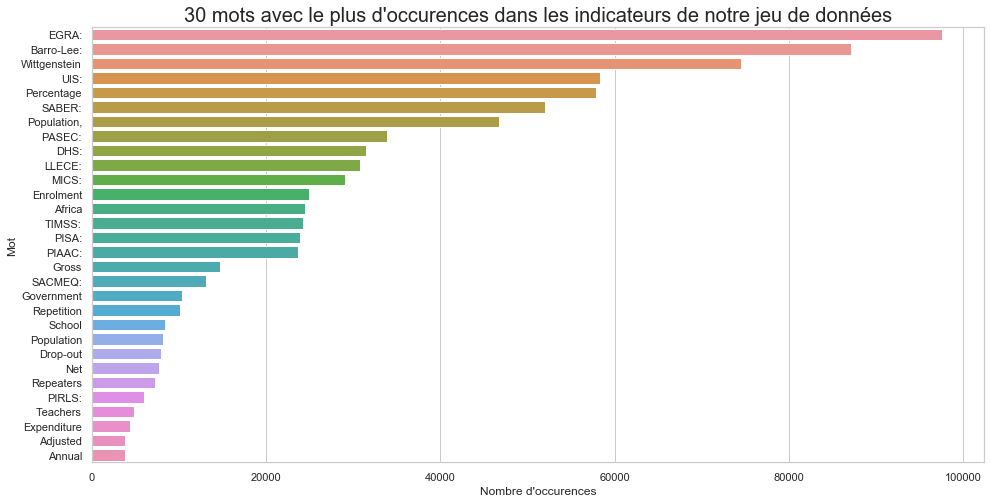

In [67]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(y = 'Mot', x='Nombre d\'occurences', data = df_mots_indicateurs_populaires)
plt.title('30 mots avec le plus d\'occurences dans les indicateurs de notre jeu de données', size=20)
#sns.barplot(x=[elem1 for elem1, elem2 in mots_indicateurs_populaires], y=[elem2 for elem1, elem2 in mots_indicateurs_populaires], hue = 'mots')
plt.show()



La recherche des mots les plus populaires dans les noms des indicateurs confirme bien que le jeu de données contient des données relatives à l'éducation. Pour les mots avec le plus d'occurence, par exemple :

    EGRA : Early Grade Reading Assessment
    Barro-lee : Dataset relatif à l'éducation
    Wittgenstein : Wittgenstein Centre Human Capital Data Explore
    UIS : UNESCO Institut de Statistiques
    PISA : Tests comparatifs de compétences pour les élèves
    Teachers
    School



## Footnote

In [68]:
footnote.head(1)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN




footnote donne des Informations sur année d'origine des données et description des données la colonne Year n'est pas vraiment utilisable en l'état, on va la nettoyer:


In [69]:
footnote['Year'] = footnote['Year'].apply(lambda x : x[2:])

In [70]:
footnote.drop(['Unnamed: 4'], axis=1, inplace=True)

In [71]:
footnote.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.


In [72]:
footnote['Year'].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

In [73]:
footnote.shape

(643638, 4)

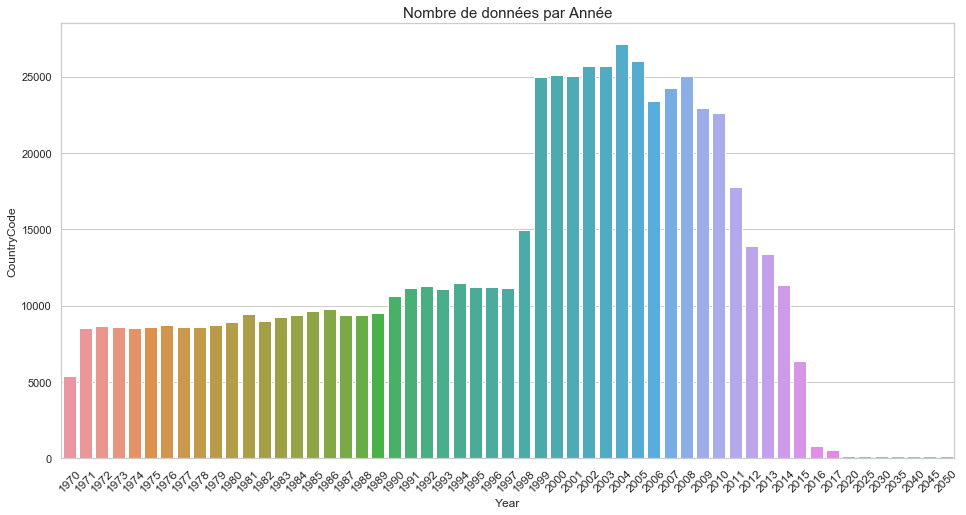

In [74]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
plt.title('Nombre de données par Année', size=15)
plot = sns.barplot(y = 'CountryCode', x='Year', data = footnote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = footnote.groupby('Year').count().reset_index()['Year'], rotation=45, size=12)
#sns.barplot(x=[elem1 for elem1, elem2 in mots_indicateurs_populaires], y=[elem2 for elem1, elem2 in mots_indicateurs_populaires], hue = 'mots')
plt.show()


## Data suite

In [75]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [76]:
data_copy = data.copy()

In [77]:
data['1970s'] = data[[str(year) for year in range(1970,1980,1)]].mean(1)

data['1980s'] = data[[str(year) for year in range(1980,1990,1)]].mean(1)
data['1990s'] = data[[str(year) for year in range(1990,2000,1)]].mean(1)
data['2000s'] = data[[str(year) for year in range(2000,2010,1)]].mean(1)
data['2010s'] = data[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
data['2020s'] = data[[str(year) for year in [2020,2025]]].mean(1)
data['2030s'] = data[[str(year) for year in [2030,2035]]].mean(1)
data['2040s'] = data[[str(year) for year in [2040,2045]]].mean(1)
data['2050s'] = data[[str(year) for year in [2050,2055]]].mean(1)
data['2060s'] = data[[str(year) for year in [2060,2065]]].mean(1)
data['2070s'] = data[[str(year) for year in [2070,2075]]].mean(1)
data['2080s'] = data[[str(year) for year in [2080,2085]]].mean(1)
data['2090s'] = data[[str(year) for year in [2090,2095]]].mean(1)
data['2100s'] = data[[str(2100)]].mean(1)

In [78]:


data.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)



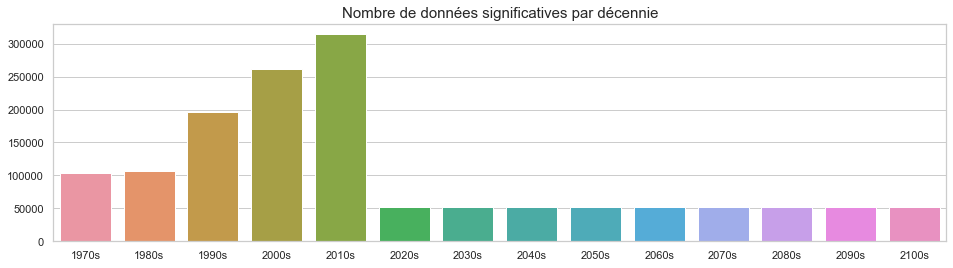

In [79]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
plt.title('Nombre de données significatives par décennie', size=15)
plot = sns.barplot(y = data.shape[0] - data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().values, x = data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().index)
plt.show()


La décennie des 2010 est celle où on a le plus de données significatives (ou le moins de NaN). Ce résultat n'est pas étonnant puisque c'est la décennie de la montée en puissance de la donnée. On va se baser sur cette décennie pour la suite de nos analyses

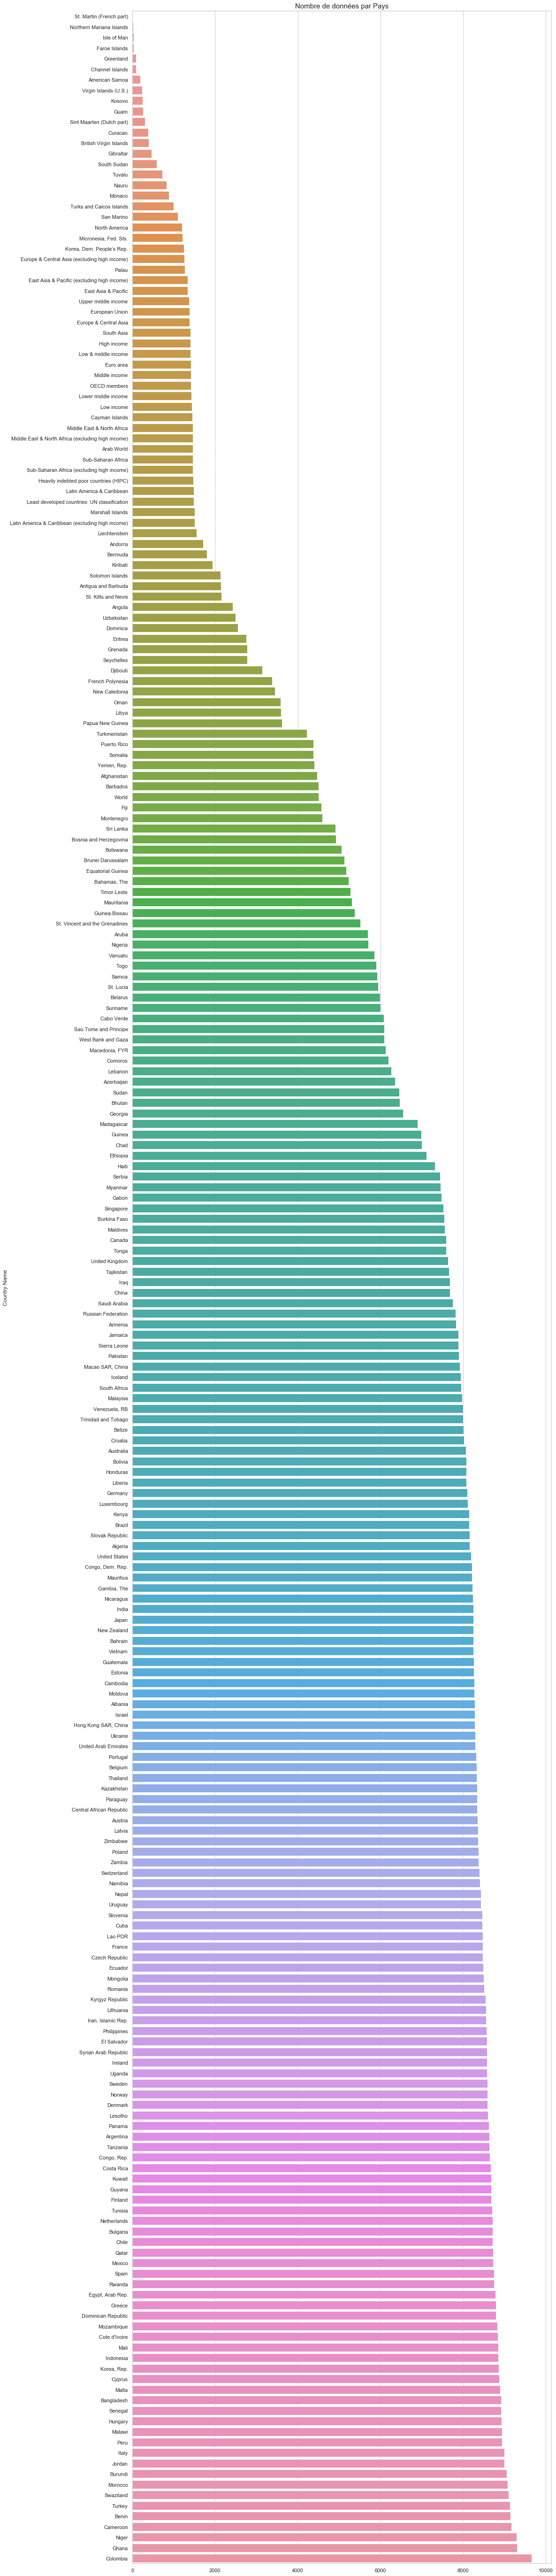

In [80]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 100))
plt.title('Nombre de données par Pays', size=15)
plot = sns.barplot(x = data.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, 
                   y = data.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().index)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


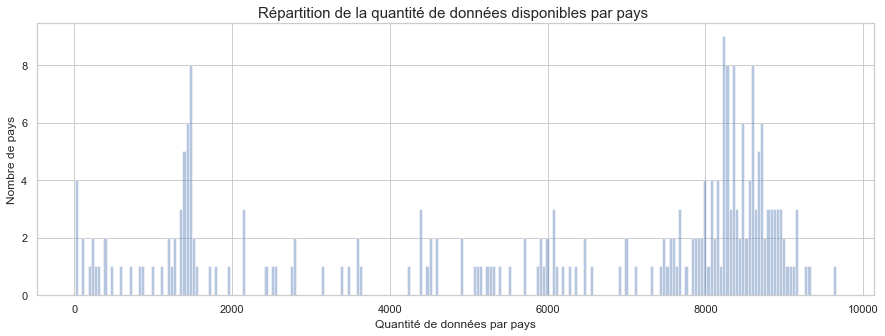

In [81]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.xlabel('Quantité de données par pays', size=12)
plt.ylabel('Nombre de pays', size=12)
plt.title('Répartition de la quantité de données disponibles par pays ', size=15)
plot = sns.distplot(data.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, bins = 241, norm_hist = False, hist_kws=dict(cumulative=False),
             kde = False)
plt.show()



Les pays pour lesquels on a moins d'informations sont:

    Les "petits" pays (faible superficie / faible population
    Les nouveaux pays (kosovo)
    Les régions et groupes de pays (east asia & pacific, upper middle income, etc.

On va regrouper les bases de données data et country, de façon à avoir les régions pour chaque pays et pouvoir faire des regroupements


In [82]:
data = data.merge(right = country[['Country Code', 'Region']], 
                  on='Country Code', how='left')


In [83]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s', 'Region'],
      dtype='object')

In [84]:
data_decades = data.copy()

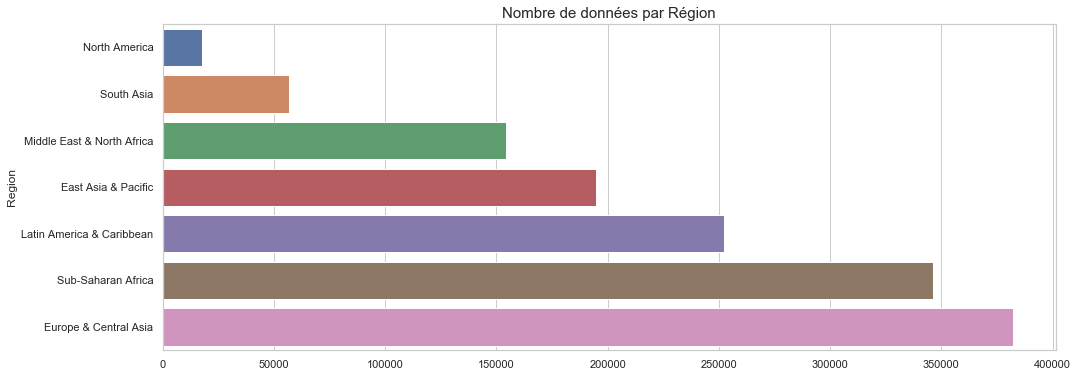

In [85]:


sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
plt.title('Nombre de données par Région', size=15)
plot = sns.barplot(x = data.groupby('Region')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, 
                   y = data.groupby('Region')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().index)
plt.show()





On voit qu'on a beaucoup plus de données pour l'Europe et l'Afrique sub saharienne que l'amérique du nord ou l'Asie du Sud. On peut expliquer ce résultat par le nombre de pays dans chaque région du globe. Ce graphe n'apporte pas d'information utile à la problématique


## EdStatsSeries

In [86]:
series.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
series.shape

(3665, 21)

In [88]:
series['Series Code'].nunique() == data['Indicator Code'].nunique()

True

## Analyse Exploratoire des données

Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

In [89]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s', 'Region'],
      dtype='object')



On va procéder à une première analyse en utilisant les colonnes suivantes: 'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010s', 'Region'


In [90]:
data_short = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010s', 'Region']]



Il faut maintenant sélectionner les indicateurs pertinents




Quels sont les indicateurs avec le plus de données?


In [91]:
data_short

,Country Name,Country Code,Indicator Name,Indicator Code,2010s,Region
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,85.478180,NaN
...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,183071.500000,Sub-Saharan Africa
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,90.679410,Sub-Saharan Africa
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,92.656455,Sub-Saharan Africa
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.046085,Sub-Saharan Africa


In [92]:
data_short[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False)

,2010s
Indicator Name,
"Population, total",240
Population growth (annual %),240
GDP per capita (current US$),229
GDP at market prices (current US$),229
Internet users (per 100 people),229
...,...
EGRA: Listening Comprehension - Share of students with a zero score (%). Songhoi. 2nd Grade,0
EGRA: Correct Letter Sounds Read Per Minute (Mean). English. 4th Grade,0
"SACMEQ: Mean performance on the reading scale, total",0


In [93]:
regions = country['Region'].unique().tolist()

In [94]:
groupes_pays = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'Euro area',
         'Europe & Central Asia',
         'Europe & Central Asia (excluding high income)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World']


In [95]:
data_short['NaN'] = data_short[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna().astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
data_heat = data_short[['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

In [97]:
data_heat_countries =  data_short[~data_short['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')
data_heat_groupes = data_short[data_short['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')


[]

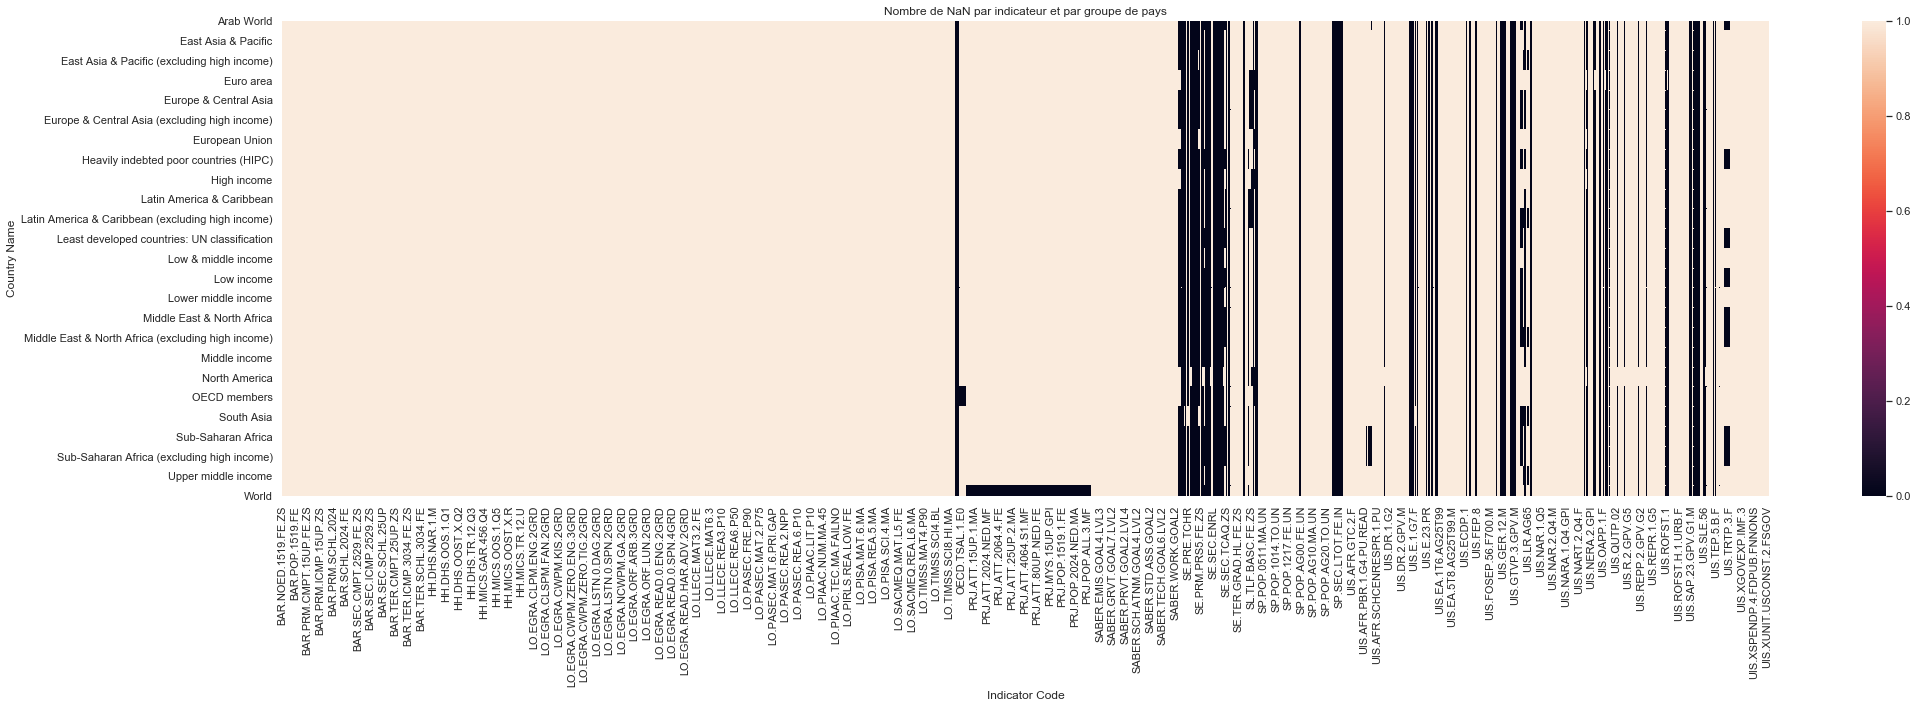

In [98]:


plt.figure(figsize=(30,10))
plt.title('Nombre de NaN par indicateur et par groupe de pays')
ax = sns.heatmap(data = data_heat_groupes)
plt.tight_layout()
plt.plot()





On peut supprimer de notre heatmap les indicateurs composés uniquement de NaN :


In [99]:
data_heat_groupes.drop(data_heat_groupes.loc[:, data_heat_groupes.sum()==0].columns.tolist(), axis=1, inplace=True)

[]

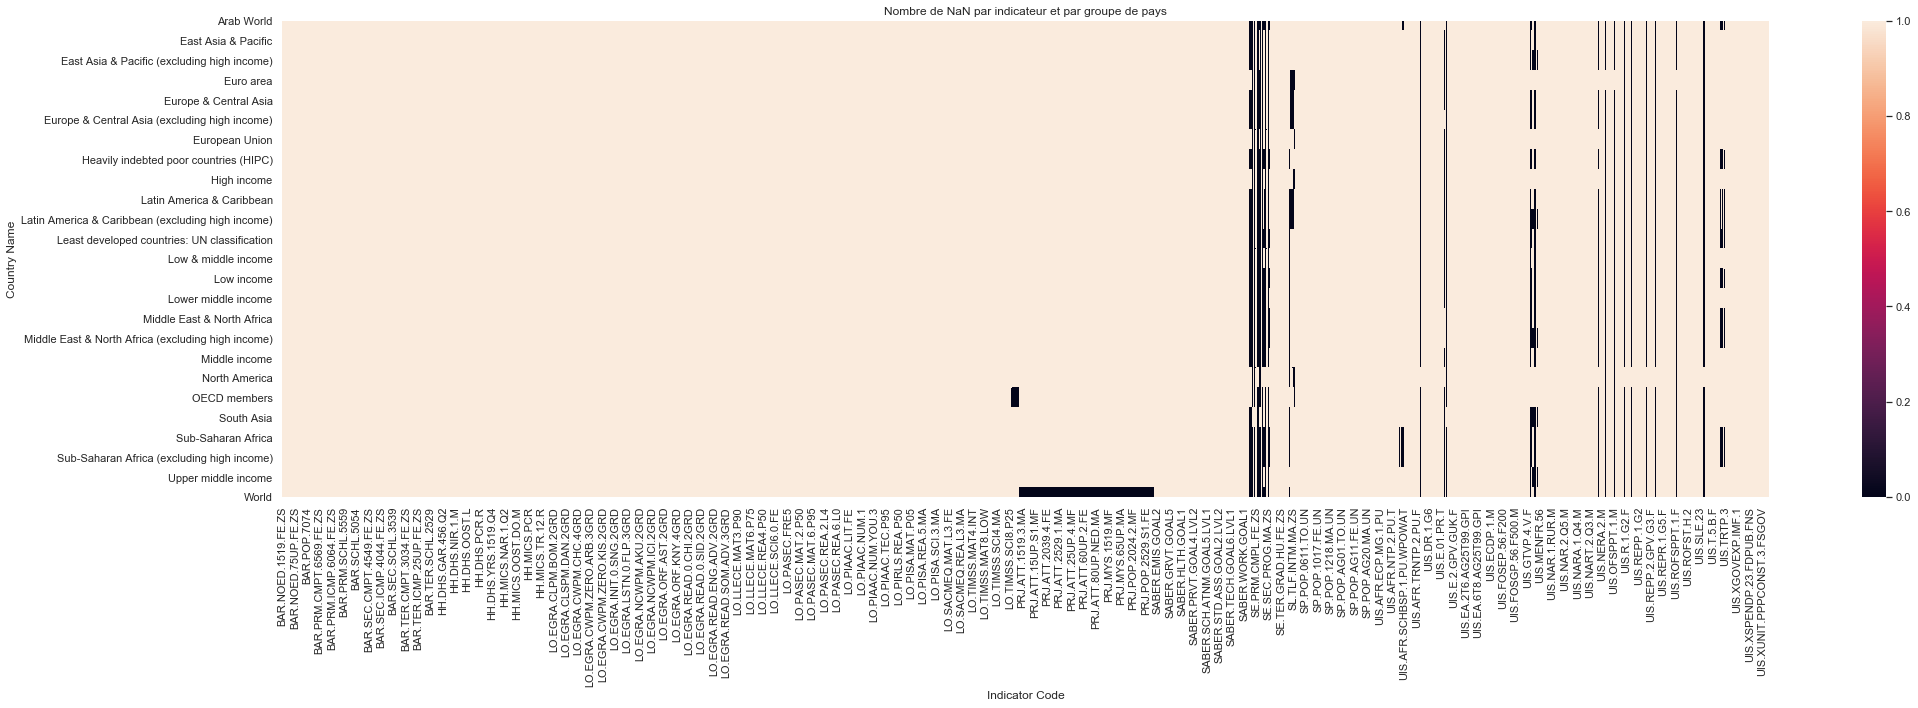

In [100]:
plt.figure(figsize=(30,10))
plt.title('Nombre de NaN par indicateur et par groupe de pays')
ax = sns.heatmap(data = data_heat_groupes)
plt.tight_layout()
plt.plot()



Ce résultat est intéressant, on voit que pour de nombreux indicateurs, il n'y a aucun NaN pour les groupes de pays! C'est le cas notamment de:

    ceux de préfixe BAR
    ceux de préfixe HH
    ceux de préfixe LO
    ceux de préfixe SP.POP
    ceux de préfixe PRU (hors zone World)

Quels indicateurs retenir?

On va conserver les indicateurs qui ont plus de 80 % de données signifiantes pour les régions et pour les pays. En faisant le tri séparément


In [101]:
data_heat_groupes.drop(data_heat_groupes.loc[:, data_heat_groupes.sum()<= data_heat_groupes.shape[0] * 80/100].columns.tolist(), axis=1, inplace=True)

In [102]:
indicateur_groupes = data_heat_groupes.columns.tolist()

In [103]:
data_heat_countries.drop(data_heat_countries.loc[:, data_heat_countries.sum()<= data_heat_countries.shape[0] * 80/100].columns.tolist(), axis=1, inplace=True)

In [104]:
indicateur_countries = data_heat_groupes.columns.tolist()

On fait l'union des 2 groupes

In [105]:
indicateurs_a_conserver = list(dict.fromkeys(indicateur_groupes + indicateur_countries))

In [106]:
print('Nombre d\'indicateurs à conserver : ', len(indicateurs_a_conserver))
print('Proportion conservée vis à vis du dataset initial : ', round(len(indicateurs_a_conserver) / data['Indicator Code'].nunique(),2) *100 ,'%')

Nombre d'indicateurs à conserver :  3277
Proportion conservée vis à vis du dataset initial :  89.0 %


On filtre maintenant data en ne conservant que les indicateurs ci-dessus

In [107]:
data = data[data['Indicator Code'].isin(indicateurs_a_conserver)]

In [108]:
data['Indicator Name'].unique().tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Africa Dataset: Average number of grades per multigrade class in primary schools (number of grades)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 1 of primary education (number)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 2 of primary education (number)',
 'Africa Dataset: Average number of pupils per mathematics textbook in Grade 3 of primary education (number)',
 'Africa Dataset: Average number of pupil

Suite à la première analyse des données, on peut se focaliser sur la recherche des données par les indicateurs contenus dans "data"

In [109]:
data.shape

(793034, 19)

liste des indicateurs : http://datatopics.worldbank.org/education/indicators

idées retenues :

    des indicateurs pour quantifier l'utilisation d'internet dans les pays et zones
    des indicateurs pour quantifier le nombre d'étudiants et lycéens (quitte à faire des calculs à partir de ces indicateurs)
    des indicateurs pour quantifier les dépenses par étudiant pour voir dans quels pays les personnes seraient en capacité de payer pour des services supplémentaires

indicateurs identifiés :

Ratios liés à l'éducation

    UIS.E.4 Enrolment in post-secondary non-tertiary education, both sexes (number)
    UIS.E.3 Enrolment in upper secondary education, both sexes (number)
    SE.TER.ENRL Enrolment in tertiary education, all programmes, both sexes (number)

Dépenses liées à l'éducation

    UIS.X.USCONST.3.FSGOV

Données démographiques:

    SP.POP.TOTL Population, total
    SP.POP.1524.TO.UN Population, ages 15-24, total

Percée de l'utilisation d'internet et des ordinateurs:

    IT.NET.USER.P2 Internet users (per 100 people)
    IT.CMP.PCMP.P2 Personal computers (per 100 people)


In [110]:
indicateurs = ['UIS.E.4',
              'UIS.E.3',
              'SE.TER.ENRL',
              'UIS.X.USCONST.3.FSGOV',
              'SP.POP.TOTL',
              'SP.POP.1524.TO.UN',
              'IT.NET.USER.P2',
              'IT.CMP.PCMP.P2']



In [111]:
data_short[data_short['Indicator Code'].isin(indicateurs)]
[['Indicator Name', 'Indicator Code', '2010s']].groupby(['Indicator Name', 'Indicator Code']).count()
.reset_index().sort_values(by='2010s',ascending=False)

,Indicator Name,Indicator Code,2010s
6,"Population, total",SP.POP.TOTL,240
3,Internet users (per 100 people),IT.NET.USER.P2,229
2,"Enrolment in upper secondary education, both s...",UIS.E.3,206
1,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,197
5,"Population, ages 15-24, total",SP.POP.1524.TO.UN,181
0,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,137
4,Personal computers (per 100 people),IT.CMP.PCMP.P2,0


In [112]:
indicateurs.pop()

'IT.CMP.PCMP.P2'

Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

In [113]:
data_countries = data_short[data_short['Country Name'].isin(list_countries)][data_short['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)
data_areas     = data_short[data_short['Country Name'].isin(areas)         ][data_short['Indicator Code'].isin(indicateurs)].drop(['NaN'], axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [114]:
def description_indicateurs(df, indicateurs, groupe):
    df_per_indicator = pd.DataFrame()
    for indicateur in indicateurs:
        df_temp = df[df['Indicator Code'] == indicateur]
        df_temp[indicateur] = df['2010s']
        df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
   
        if df_per_indicator.empty is False:
            df_per_indicator = df_per_indicator.merge(right = df_temp, how = 'outer', on = ['Country Code', 'Country Name', 'Region']).sort_values(by='Country Name')
        else:
            df_per_indicator = df_temp
            
            
    description = df_per_indicator.groupby([groupe])[indicateurs].describe(percentiles = [0.5])
    for indicateur in indicateurs:
        description[(indicateur, 'sum')] = description[(indicateur, 'count')] * description[(indicateur, 'mean')]
    colonnes = []
    for indicateur in indicateurs:
        for stat in ['mean', 'std', '50%', 'sum'] :
            colonnes += [(indicateur, stat)]
    description = description[colonnes]
    description.reset_index(inplace=True)
    return description, df_per_indicator


In [115]:
description_countries, df_countries = description_indicateurs(data_countries, indicateurs, 'Region')
description_zones, df_zones     = description_indicateurs(data_areas, indicateurs, 'Country Name')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,




On obtient un tableau récap de tous les indicateurs par Régions et par zone géographique :


In [116]:
description_countries

Region        UIS.E.4                                \
                                        mean            std            50%   
0         East Asia & Pacific  179427.537019  279200.588624   27841.000000   
1       Europe & Central Asia   50031.265382  133776.183721   10813.000000   
2   Latin America & Caribbean   53614.363158  180525.720490    3103.000000   
3  Middle East & North Africa    9253.450000   10918.928517    5705.125000   
4               North America  799251.325000            NaN  799251.325000   
5                  South Asia  128660.658333  172484.615145   57321.566667   
6          Sub-Saharan Africa   36579.266667   69361.871705    4679.000000   

                      UIS.E.3                                           \
            sum          mean           std          50%           sum   
0  2.332558e+06  3.104989e+06  9.740027e+06   148159.400  6.520477e+07   
1  1.901188e+06  6.133072e+05  9.304212e+05   263745.900  3.066536e+07   
2  1.018673e+06  6.772967e+05  1.758547e+06   124699.625  2.302809e+07   
3  9.253450e+04  4.005455e+05  5.018389e+05   159624.325  6.408728e+06   
4  7.992513e+05  4.468791e+06  6.342389e+06  1675808.500  1.340637e+07   
5  7.719640e+05  9.415460e+06  1.924265e+07  1262076.500  6.590822e+07   
6  6.950061e+05  4.447514e+05  8.523980e+05   136223.100  1.512155e+07   

    SE.TER.ENRL  ...   SP.POP.TOTL               SP.POP.1524.TO.UN  \
           mean  ...           50%           sum              mean   
0  3.029385e+06  ...  2.027884e+06  2.151557e+09      1.461382e+07   
1  6.263273e+05  ...  5.530253e+06  7.537515e+08      2.203308e+06   
2  7.455761e+05  ...  3.578169e+06  5.863286e+08      3.457839e+06   
3  3.503854e+05  ...  7.142249e+06  2.199133e+08      2.167307e+06   
4  1.013747e+07  ...  3.513338e+07  3.514559e+08      2.484806e+07   
5  4.065026e+06  ...  2.985991e+07  1.698974e+09      4.122661e+07   
6  1.769331e+05  ...  1.156291e+07  8.524755e+08      4.068331e+06   

                                            IT.NET.USER.P2             \
            std           50%           sum           mean        std   
0  4.340982e+07  1.438153e+06  3.361179e+08      39.110122  27.014509   
1  2.918516e+06  1.107469e+06  9.694557e+07      66.374672  21.119148   
2  7.053947e+06  1.337724e+06  1.002773e+08      45.178755  17.067168   
3  2.486249e+06  1.042890e+06  3.901152e+07      51.630411  25.062528   
4  2.884377e+07  2.484806e+07  4.969611e+07      83.859491  10.156386   
5  8.182133e+07  6.607114e+06  3.298129e+08      18.698948  11.954131   
6  6.184988e+06  2.361723e+06  1.668016e+08      13.577007  12.049061   

                           
         50%          sum  
0  34.764191  1134.193534  
1  65.785332  3385.108250  
2  45.003936  1536.077659  
3  56.625398   929.347404  
4  85.361429   251.578473  
5  15.420493   149.591586  
6   9.218154   570.234274  

[7 rows x 29 columns]

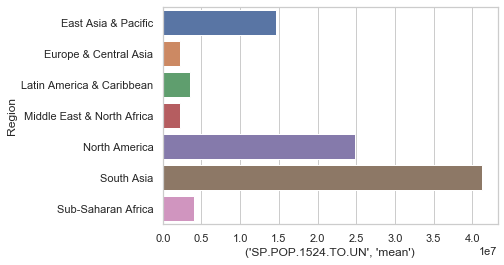

In [117]:
sns.barplot(x= description_countries[('SP.POP.1524.TO.UN','mean')], y=description_countries['Region'])

In [118]:
description_zones.head()

Country Name       UIS.E.4      \
                                                          mean std   
0                                     Arab World  2.631211e+05 NaN   
1                            East Asia & Pacific  2.302949e+06 NaN   
2    East Asia & Pacific (excluding high income)  1.844454e+06 NaN   
3                                      Euro area  1.101148e+06 NaN   
4  Europe & Central Asia (excluding high income)  6.241610e+05 NaN   

                                  UIS.E.3                              \
            50%           sum        mean std         50%         sum   
0  2.631211e+05  2.631211e+05  11662032.4 NaN  11662032.4  11662032.4   
1  2.302949e+06  2.302949e+06  69637812.8 NaN  69637812.8  69637812.8   
2  1.844454e+06  1.844454e+06  62314336.0 NaN  62314336.0  62314336.0   
3  1.101148e+06  1.101148e+06  12966761.2 NaN  12966761.2  12966761.2   
4  6.241610e+05  6.241610e+05  13692785.4 NaN  13692785.4  13692785.4   

  SE.TER.ENRL  ...   SP.POP.TOTL               SP.POP.1524.TO.UN              \
         mean  ...           50%           sum              mean std 50% sum   
0   9222392.0  ...  3.587756e+08  3.587756e+08               NaN NaN NaN NaN   
1  60141309.6  ...  2.250835e+09  2.250835e+09               NaN NaN NaN NaN   
2  50806228.8  ...  2.007695e+09  2.007695e+09               NaN NaN NaN NaN   
3  12889542.4  ...  3.376978e+08  3.376978e+08               NaN NaN NaN NaN   
4  19073678.8  ...  4.102482e+08  4.102482e+08               NaN NaN NaN NaN   

  IT.NET.USER.P2                            
            mean std        50%        sum  
0      31.834459 NaN  31.834459  31.834459  
1      43.754148 NaN  43.754148  43.754148  
2      38.968510 NaN  38.968510  38.968510  
3      75.580997 NaN  75.580997  75.580997  
4      51.297737 NaN  51.297737  51.297737  

[5 rows x 29 columns]



On peut tracer des tableaux récapitulatifs des indicateurs par zone géographique


In [119]:
data_orig[data_orig['Indicator Code'] == 'UIS.E.4']['Indicator Name'].unique()[0]

'Enrolment in post-secondary non-tertiary education, both sexes (number)'

In [120]:
data_orig[data_orig['Indicator Code'].isin(['UIS.X.USCONST.3.FSGOV'])].count().sum()

0

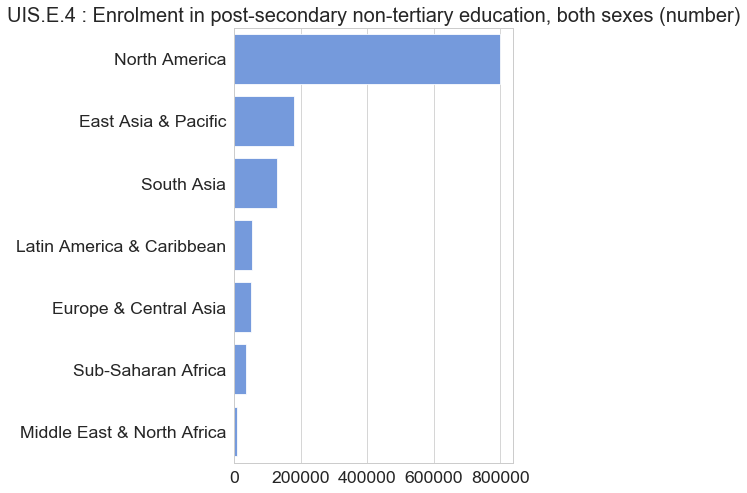

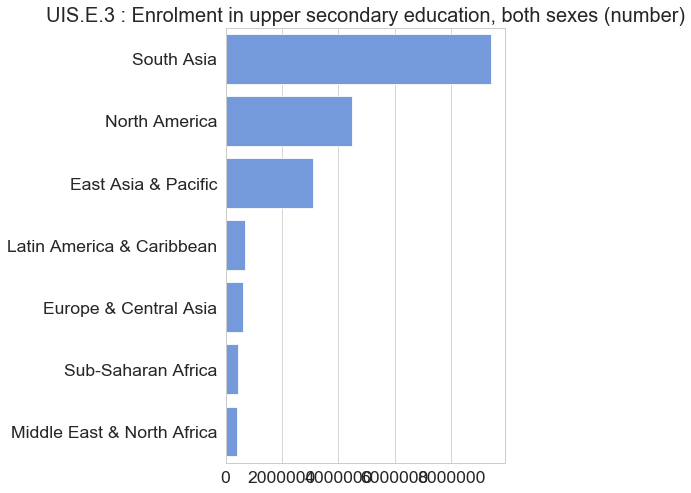

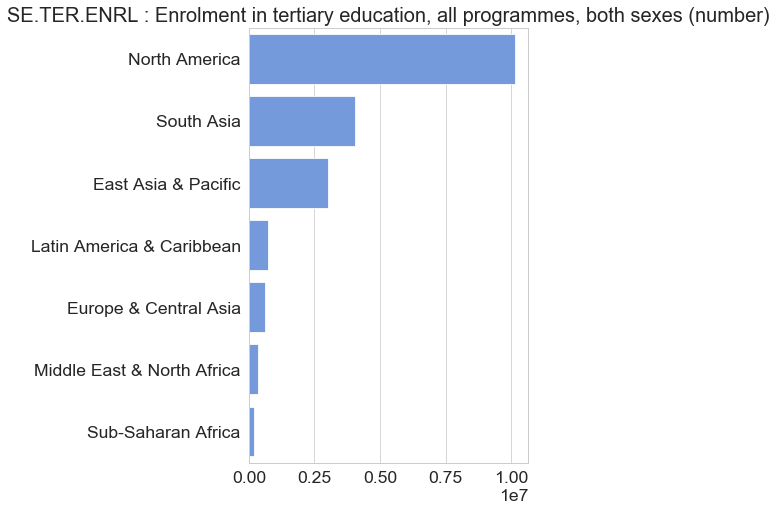



UIS.X.USCONST.3.FSGOV  : Aucune donnée à afficher.


<Figure size 360x576 with 0 Axes>

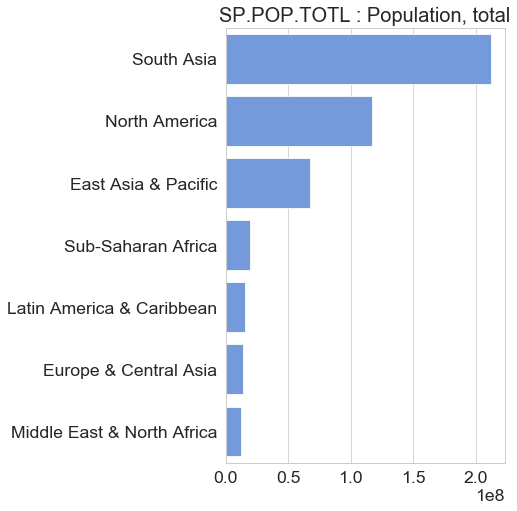

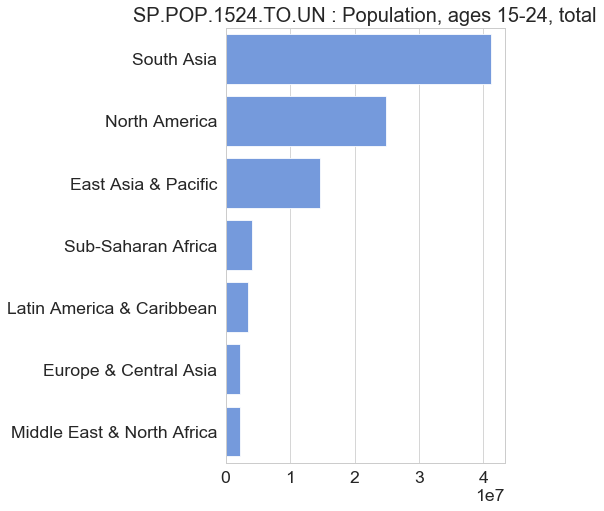

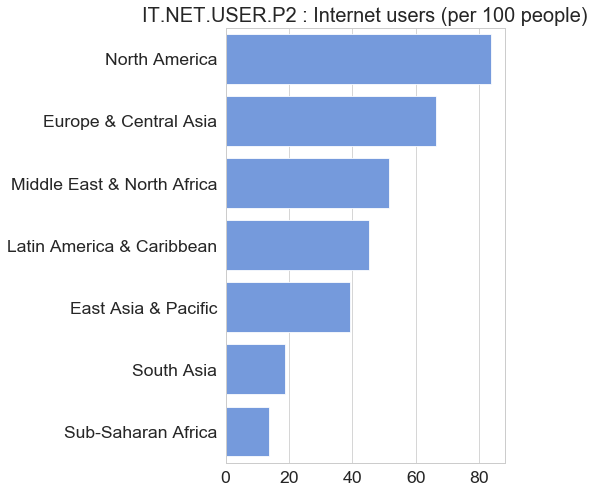

In [121]:
for indicateur in indicateurs:
    plt.figure(figsize = (5,8))
    sns.set_context("paper", font_scale=2)
    if data_orig[data_orig['Indicator Code'].isin([indicateur])].count().sum() > 0 :
        chaine = indicateur + ' : ' + data_orig[data_orig['Indicator Code'] == indicateur]['Indicator Name'].unique()[0]
        plt.title(chaine, size=20)
        description_countries.sort_values(by=(indicateur, 'mean'), ascending=False, inplace=True)
        ax = plt.gca()
        sns.barplot(x = description_countries[(indicateur, 'mean')], y=description_countries['Region'], color='cornflowerblue')
        ax.set_ylabel('')    
        ax.set_xlabel('')
        plt.show()
        print('\n')
    else:
        print(indicateur, ' : Aucune donnée à afficher.')

In [122]:
data_countries.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2010s,Region
92796,Afghanistan,AFG,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,96959.8,South Asia
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,180189.0,South Asia


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


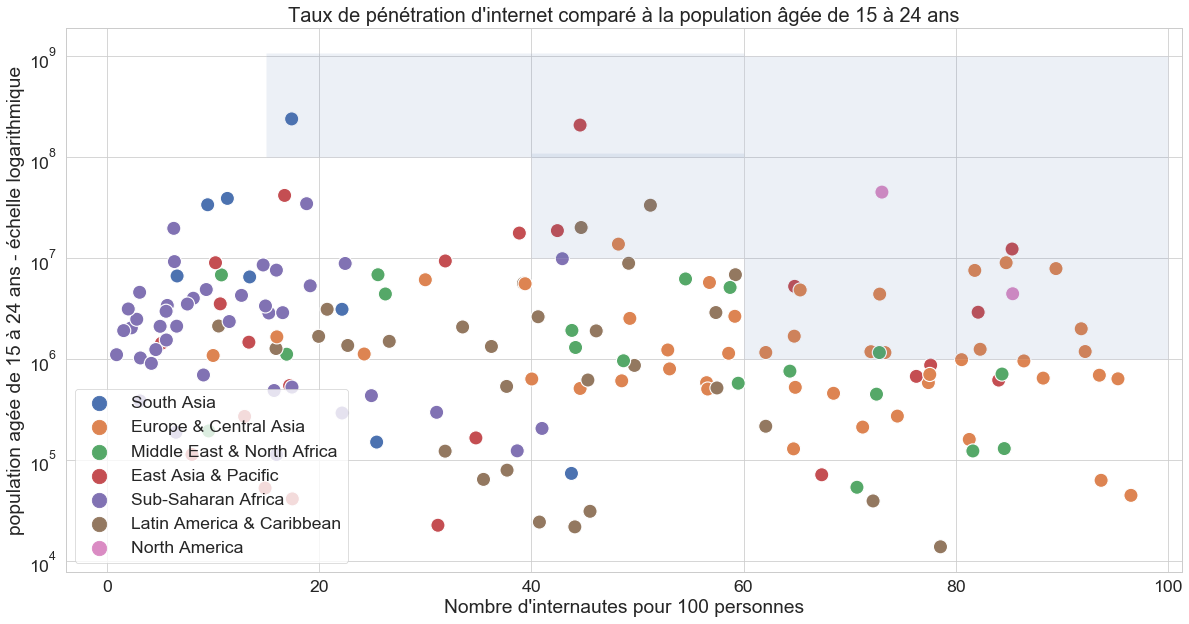

In [123]:
import matplotlib.patches as patches
plt.figure(figsize = (20,10))
ax = plt.gca()
sns.set_context("paper", font_scale=2)
sns.scatterplot(df_countries['IT.NET.USER.P2'], df_countries['SP.POP.1524.TO.UN'], hue=df_countries['Region'], s=200)
plt.xlabel('Nombre d\'internautes pour 100 personnes')
ax.add_patch(patches.Rectangle((15, 100000000), 45, 990000000, alpha=0.1))
ax.add_patch(patches.Rectangle((40, 10000000), 20, 99900000, alpha=0.1))
ax.add_patch(patches.Rectangle((60, 1000000), 40, 999000000, alpha=0.1))

plt.legend(loc='lower left',markerscale=3)

#legend_elemnts = [patches.Patch(alpha=0.1, label='Potential customers')]
#plt.legend(handles = legend_elements, loc='lower left',markerscale=3)


ax.set_yscale('log')
plt.ylabel('population agée de 15 à 24 ans - échelle logarithmique')
plt.title('Taux de pénétration d\'internet comparé à la population âgée de 15 à 24 ans', size=20)
plt.show()




On imagine que les pays en bleu pourraient former un bon vivier de clients potentiels :

    population jeune importante à très importante avec internet moyennement développé
    population jeune relativement importe conjuguée à un nombre d'internautes élevé

Il faut maintenant en avoir la confirmation en déterminant le nombre de clients potentiels


In [124]:
df_countries[((df_countries['IT.NET.USER.P2'] > 15) & (df_countries['SP.POP.1524.TO.UN'] > 100000000))  |  ((df_countries['IT.NET.USER.P2'] > 60) & (df_countries['SP.POP.1524.TO.UN'] > 1000000))].sort_values(by='SP.POP.1524.TO.UN',ascending = False)[['Country Name']]

,Country Name
78,India
38,China
189,United States
86,Japan
62,Germany
188,United Kingdom
58,France
106,Malaysia
140,Poland
32,Canada




Première analyse graphique avec les barplots

    très important nombre de lycéens et d'étudiants dans le supérieur en East Asia & Pacific
    taux de pénétration d'internet le plus élevé en amérique du nord, europe et asie centrale, moyen en east asia & pacific

Pour l'analyse, j'aimerais connaître :

    le nombre de lycéens et étudiants par pays:
    une estimation du nombre de lycéens avec internet par pays
    l\'évolution du taux de pénétration d'internet par pays




Quels sont les pays avec un fort potentiel de clients pour nos services ?


In [130]:
#on va créer un indicateur lycée + supérieur:

df_countries['customers'] = df_countries['UIS.E.3'] + df_countries['UIS.E.4'] + df_countries['SE.TER.ENRL'] 
print('liste des pays avec le plus de lycéens et étudiants')
df_countries.sort_values(by='customers', ascending=False)[['Country Name', 'customers']].head(20)

liste des pays avec le plus de lycéens et étudiants


,Country Name,customers
78,India,8.103193e+07
38,China,8.083619e+07
189,United States,3.280134e+07
25,Brazil,1.774776e+07
86,Japan,7.552915e+06
14,Bangladesh,7.498949e+06
62,Germany,6.343626e+06
133,Pakistan,6.309889e+06
188,United Kingdom,5.770901e+06
139,Philippines,5.597267e+06


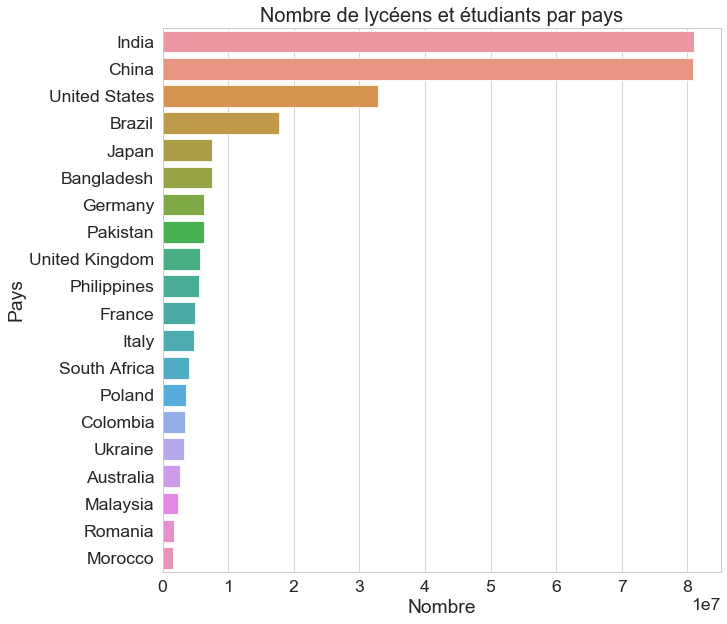

In [131]:


plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = df_countries.sort_values(by='customers', ascending=False)['customers'].head(20), y=df_countries.sort_values(by='customers', ascending=False)['Country Name'].head(20))
plt.title('Nombre de lycéens et étudiants par pays', size=20)
plt.xlabel('Nombre')
plt.ylabel('Pays')
plt.show()



In [132]:
#on va multiplier ce nombre avec le taux de pénétration d'internet pour avoir une estimation du nombre de clients potentiels:
df_countries['potential_customers'] = df_countries['customers'] * df_countries['IT.NET.USER.P2']/100



On peut avoir une estimation du nombre de clients potentiels en multipliant le nombre d'étudiants et lycéens par la part d'utilisation d'internet


In [133]:
df_countries.sort_values(by='potential_customers', ascending=False)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].head(20)


,Country Name,IT.NET.USER.P2,customers,potential_customers
38,China,44.585731,8.083619e+07,3.604141e+07
189,United States,73.035771,3.280134e+07,2.395671e+07
78,India,17.399603,8.103193e+07,1.409923e+07
25,Brazil,51.214529,1.774776e+07,9.089430e+06
86,Japan,85.306401,7.552915e+06,6.443120e+06
62,Germany,84.745271,6.343626e+06,5.375923e+06
188,United Kingdom,89.441457,5.770901e+06,5.161578e+06
58,France,81.789500,4.954075e+06,4.051913e+06
84,Italy,56.780535,4.734863e+06,2.688480e+06
139,Philippines,42.447732,5.597267e+06,2.375913e+06


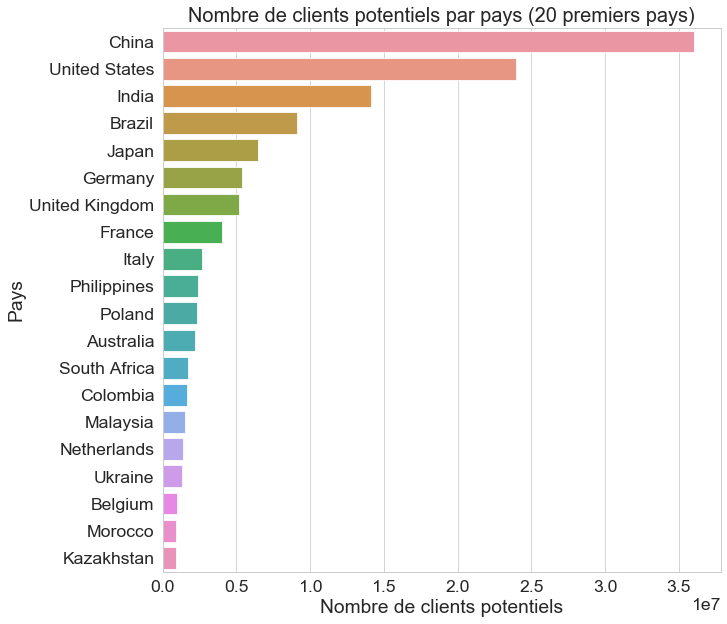

In [134]:
clients_potentiels = df_countries.sort_values(by='potential_customers', na_position='first', ascending=True)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].tail(20).sort_values(by='potential_customers',ascending=False)
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)
plt.title('Nombre de clients potentiels par pays (20 premiers pays)', fontsize=20)
ax = plt.gca()
sns.barplot(x = clients_potentiels['potential_customers'], y=clients_potentiels['Country Name'])
plt.xlabel('Nombre de clients potentiels')
plt.ylabel('Pays')
plt.show()

In [135]:


#on garde les pays potentiels avec plus de 1 million de clients potentiels
selected_countries = clients_potentiels[clients_potentiels['potential_customers'] > 1000000]['Country Name'].tolist()
print(selected_countries)



['China', 'United States', 'India', 'Brazil', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy', 'Philippines', 'Poland', 'Australia', 'South Africa', 'Colombia', 'Malaysia', 'Netherlands', 'Ukraine']




Maintenant qu'on a la liste des pays avec le plus de clients potentiels, il faut regarder:

    la tendance d'évolution du nombre d'étudiants
    l'évolution de l'implantation d'internet dans le pays



In [136]:
future = {}
for country in selected_countries:
    future[country] = (data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'UIS.E.3')]['2020s'].values
              +data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'UIS.E.4')]['2020s'].values
              +data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'SE.TER.ENRL')]['2020s'].values)*data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'IT.NET.USER.P2')]['2020s'].values/100



In [137]:
data_final = data_orig[data_orig['Country Name'].isin(selected_countries) & data_orig['Indicator Code'].isin(['UIS.E.3', 'UIS.E.4', 'SE.TER.ENRL', 'IT.NET.USER.P2'])]

In [138]:
data_final_melt = data_final.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'], var_name = 'Year', value_name = 'Value')

In [139]:


data_final_melt['Year'] = data_final_melt['Year'].astype('int32')



In [140]:


data_final_melt = data_final_melt[data_final_melt['Year'] > 2010]



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packa

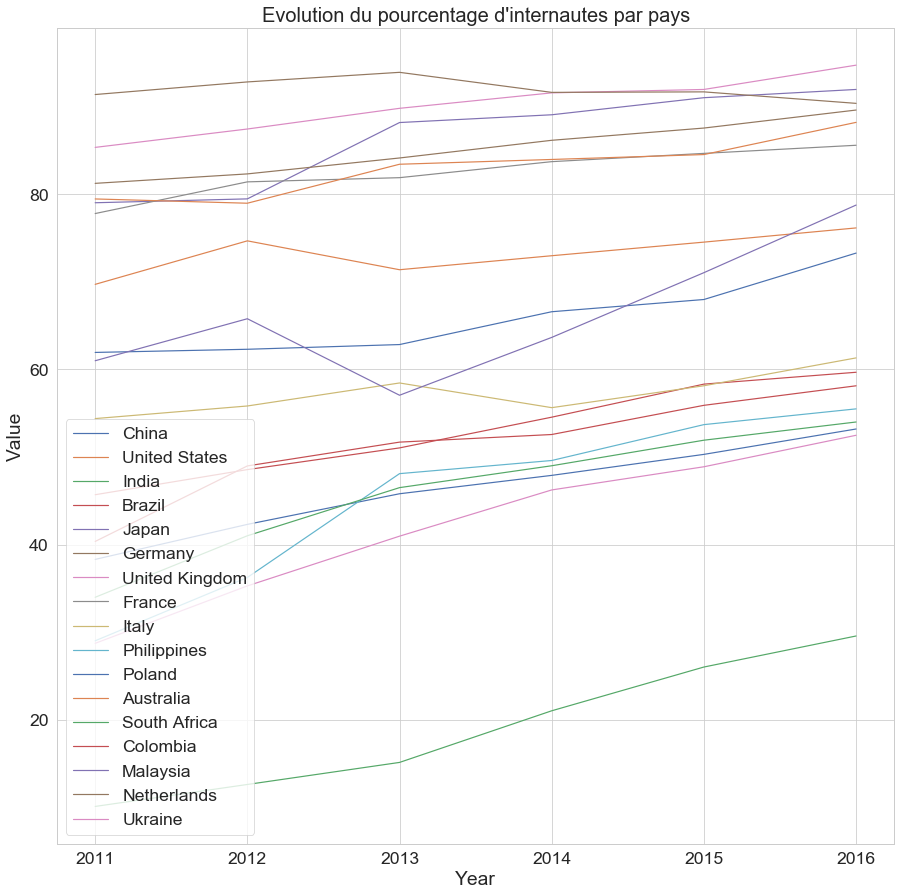

In [141]:
plt.figure(figsize = (15,15))
for country in selected_countries:
    sns.lineplot(data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries, loc = 'lower left', )
plt.title('Evolution du pourcentage d\'internautes par pays', size=20)
plt.show()


Le graphe ne donne pas de projections après 2016 par contre il montre clairement une tendance haussière quasi linéaire. On peut donc estimer que les pays de notre liste ayant le moins accès à internet aujourd'hui verront leur part augmenter jusqu'au seuil de 80 %

In [147]:
data_final_melt['Country Name'].unique()

array(['Australia', 'Brazil', 'China', 'Colombia', 'France', 'Germany',
       'India', 'Italy', 'Japan', 'Malaysia', 'Netherlands',
       'Philippines', 'Poland', 'South Africa', 'Ukraine',
       'United Kingdom', 'United States'], dtype=object)